<a href="https://colab.research.google.com/github/nassim-fox/Huffman/blob/master/keras_ahcd1_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import tensorflow as tf

import numpy as np
import pandas as pd
from matplotlib import pyplot as p



In [0]:
#Loading the dataset

x_train = pd.read_csv('csvTrainImages 13440x1024.csv')
y_train = pd.read_csv('csvTrainLabel 13440x1.csv')
x_test = pd.read_csv('csvTestImages 3360x1024.csv')
y_test = pd.read_csv('csvTestLabel 3360x1.csv')


In [0]:
x_train = np.asarray(x_train).reshape(x_train.shape[0],32,32,1)
x_test = np.asarray(x_test).reshape(x_test.shape[0],32,32,1)


In [0]:
#scaling x in range [0,1] 
x_train_scaled = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) 
x_test_scaled = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)) 

#onehot encoding for labels
y_train_labels = tf.keras.utils.to_categorical(y_train) 
y_test_labels = tf.keras.utils.to_categorical(y_test) 


و


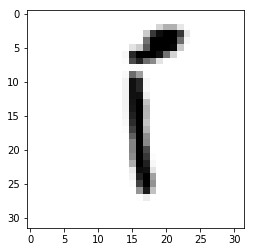

In [32]:

im = np.asarray(x_train[0]).reshape(32,32).T
#print(im.shape)

i = "\xd9\x88"
print(i.encode('latin-1').decode('utf8'))

p.imshow(im,cmap='binary')
p.show()

In [0]:
alph = list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')

In [0]:
#building the model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),input_shape=(32,32,1),padding='same',activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),padding='same',activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(29,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
model.fit(x_train_scaled,y_train_labels,epochs=10,validation_data=(x_test_scaled,y_test_labels))

Train on 13439 samples, validate on 3359 samples
Epoch 1/10
13439/13439 [==============================] - 5s 372us/sample - loss: 1.0377 - acc: 0.6747 - val_loss: 0.4285 - val_acc: 0.8622
Epoch 2/10
13439/13439 [==============================] - 4s 327us/sample - loss: 0.3120 - acc: 0.8993 - val_loss: 0.2983 - val_acc: 0.9092
Epoch 3/10
13439/13439 [==============================] - 4s 321us/sample - loss: 0.1762 - acc: 0.9415 - val_loss: 0.2664 - val_acc: 0.9229
Epoch 4/10
13439/13439 [==============================] - 4s 325us/sample - loss: 0.1212 - acc: 0.9594 - val_loss: 0.2085 - val_acc: 0.9360
Epoch 5/10
13439/13439 [==============================] - 4s 321us/sample - loss: 0.0816 - acc: 0.9722 - val_loss: 0.2315 - val_acc: 0.9390
Epoch 6/10
13439/13439 [==============================] - 4s 318us/sample - loss: 0.0648 - acc: 0.9784 - val_loss: 0.3035 - val_acc: 0.9265
Epoch 7/10
13439/13439 [==============================] - 4s 312us/sample - loss: 0.0528 - acc: 0.9819 - val_lo

In [70]:
score = model.evaluate(x_test_scaled, y_test_labels, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.24697963198650785
Test accuracy: 0.941947


In [0]:
prediction = model.predict(x_test_scaled)

predicted 0 :  ك
predicted 1 :  ي
predicted 2 :  ط
predicted 3 :  س
predicted 4 :  ج
predicted 5 :  د
predicted 6 :  ط
predicted 7 :  د
predicted 8 :  ق
predicted 9 :  ش


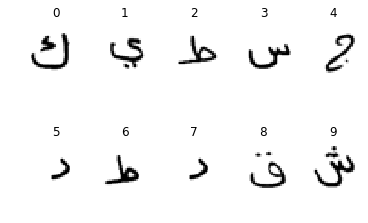

In [121]:
ax = [0,0,0,0,0,0,0,0,0,0]
f, ((ax[0] ,ax[1] , ax[2], ax[3], ax[4]),( ax[5],ax[6] ,ax[7], ax[8], ax[9])) = p.subplots(2,5)

r = np.random.randint(100,size=(1,10))[0]

for i in range(10) : 
    ax[i].imshow(x_test[r[i]].reshape(32,32).T,cmap='binary')
    ax[i].set_title('{}'.format(i))
    print("predicted {} :  ".format(i)+alph[np.argmax(prediction[r[i]])-1])
    ax[i].axis("off")


In [0]:

model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    

model.save_weights("model.h5")